# Load the Dataset

In [15]:
import pandas as pd

# Load the dataset from the CSV file
df = pd.read_csv('Heart_Disease_Prediction.csv')

# Display the first few rows of the dataset
print(df.head())


   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

# Encode the categorical variable

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Heart Disease' column
label_encoder = LabelEncoder()
df['Heart Disease'] = label_encoder.fit_transform(df['Heart Disease'])

# Now, 'Presence' and 'Absence' are converted to numeric values
print(df.head())


   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0

# Exploratory Data Analysis (EDA)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print(df.isnull().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [18]:
# Basic statistics
print(df.describe())

              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min 

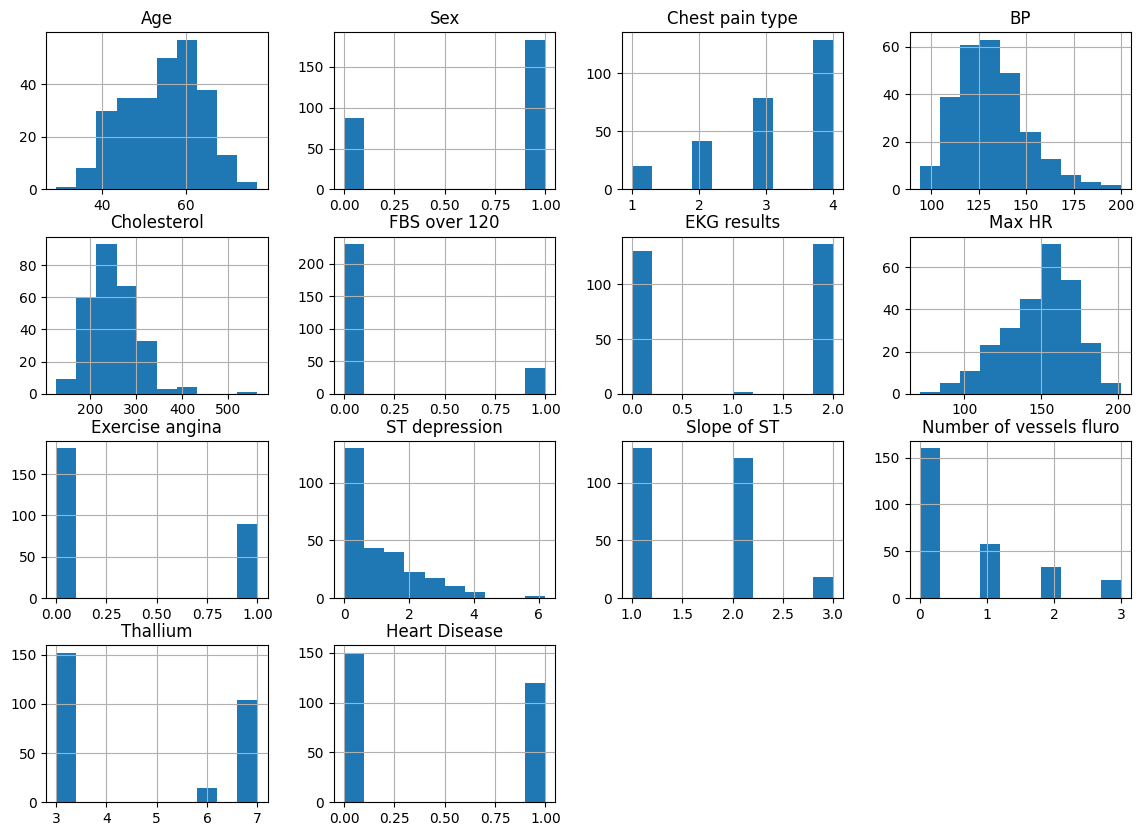

In [19]:
# Visualize the distribution of each feature
df.hist(figsize=(14, 10))
plt.show()

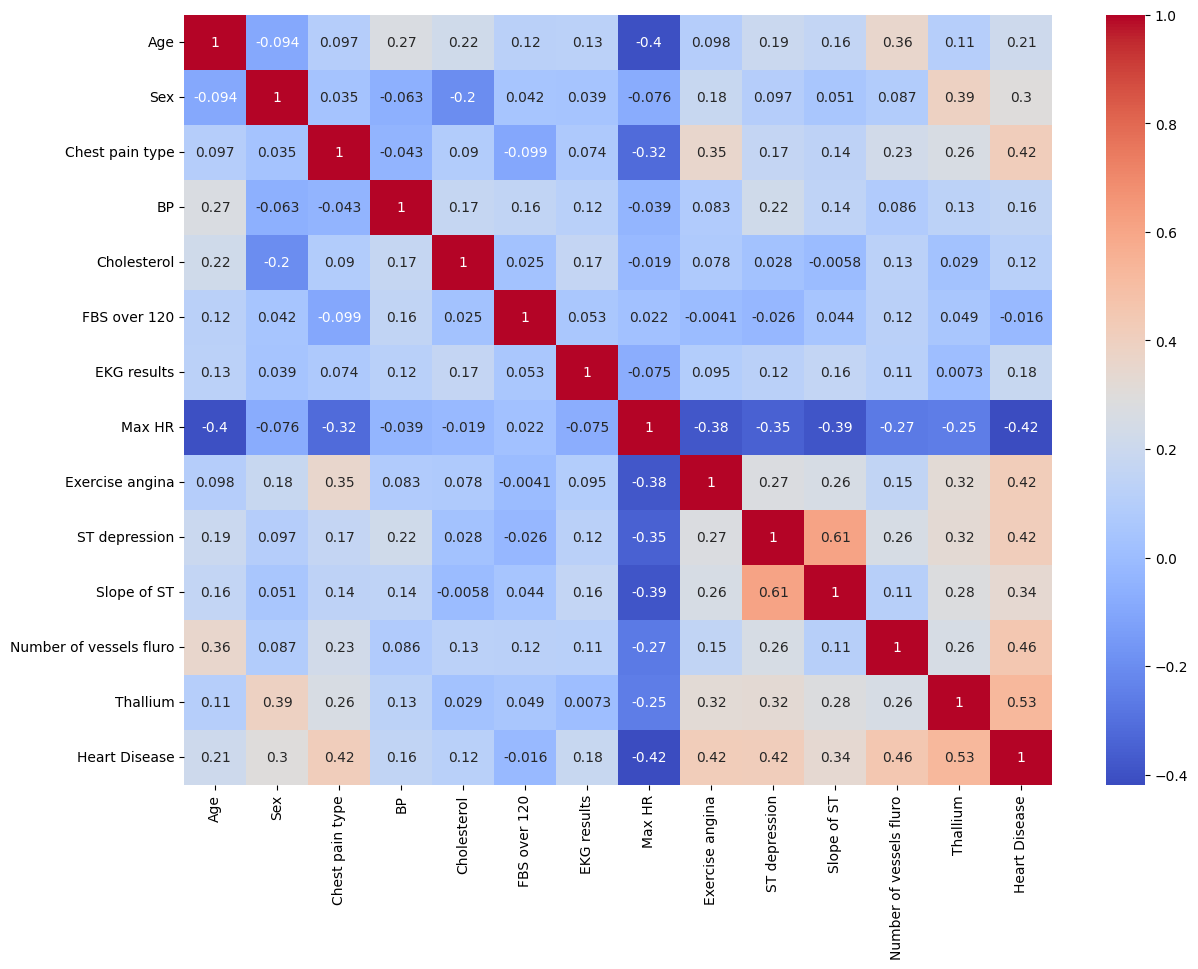

In [7]:
# Visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

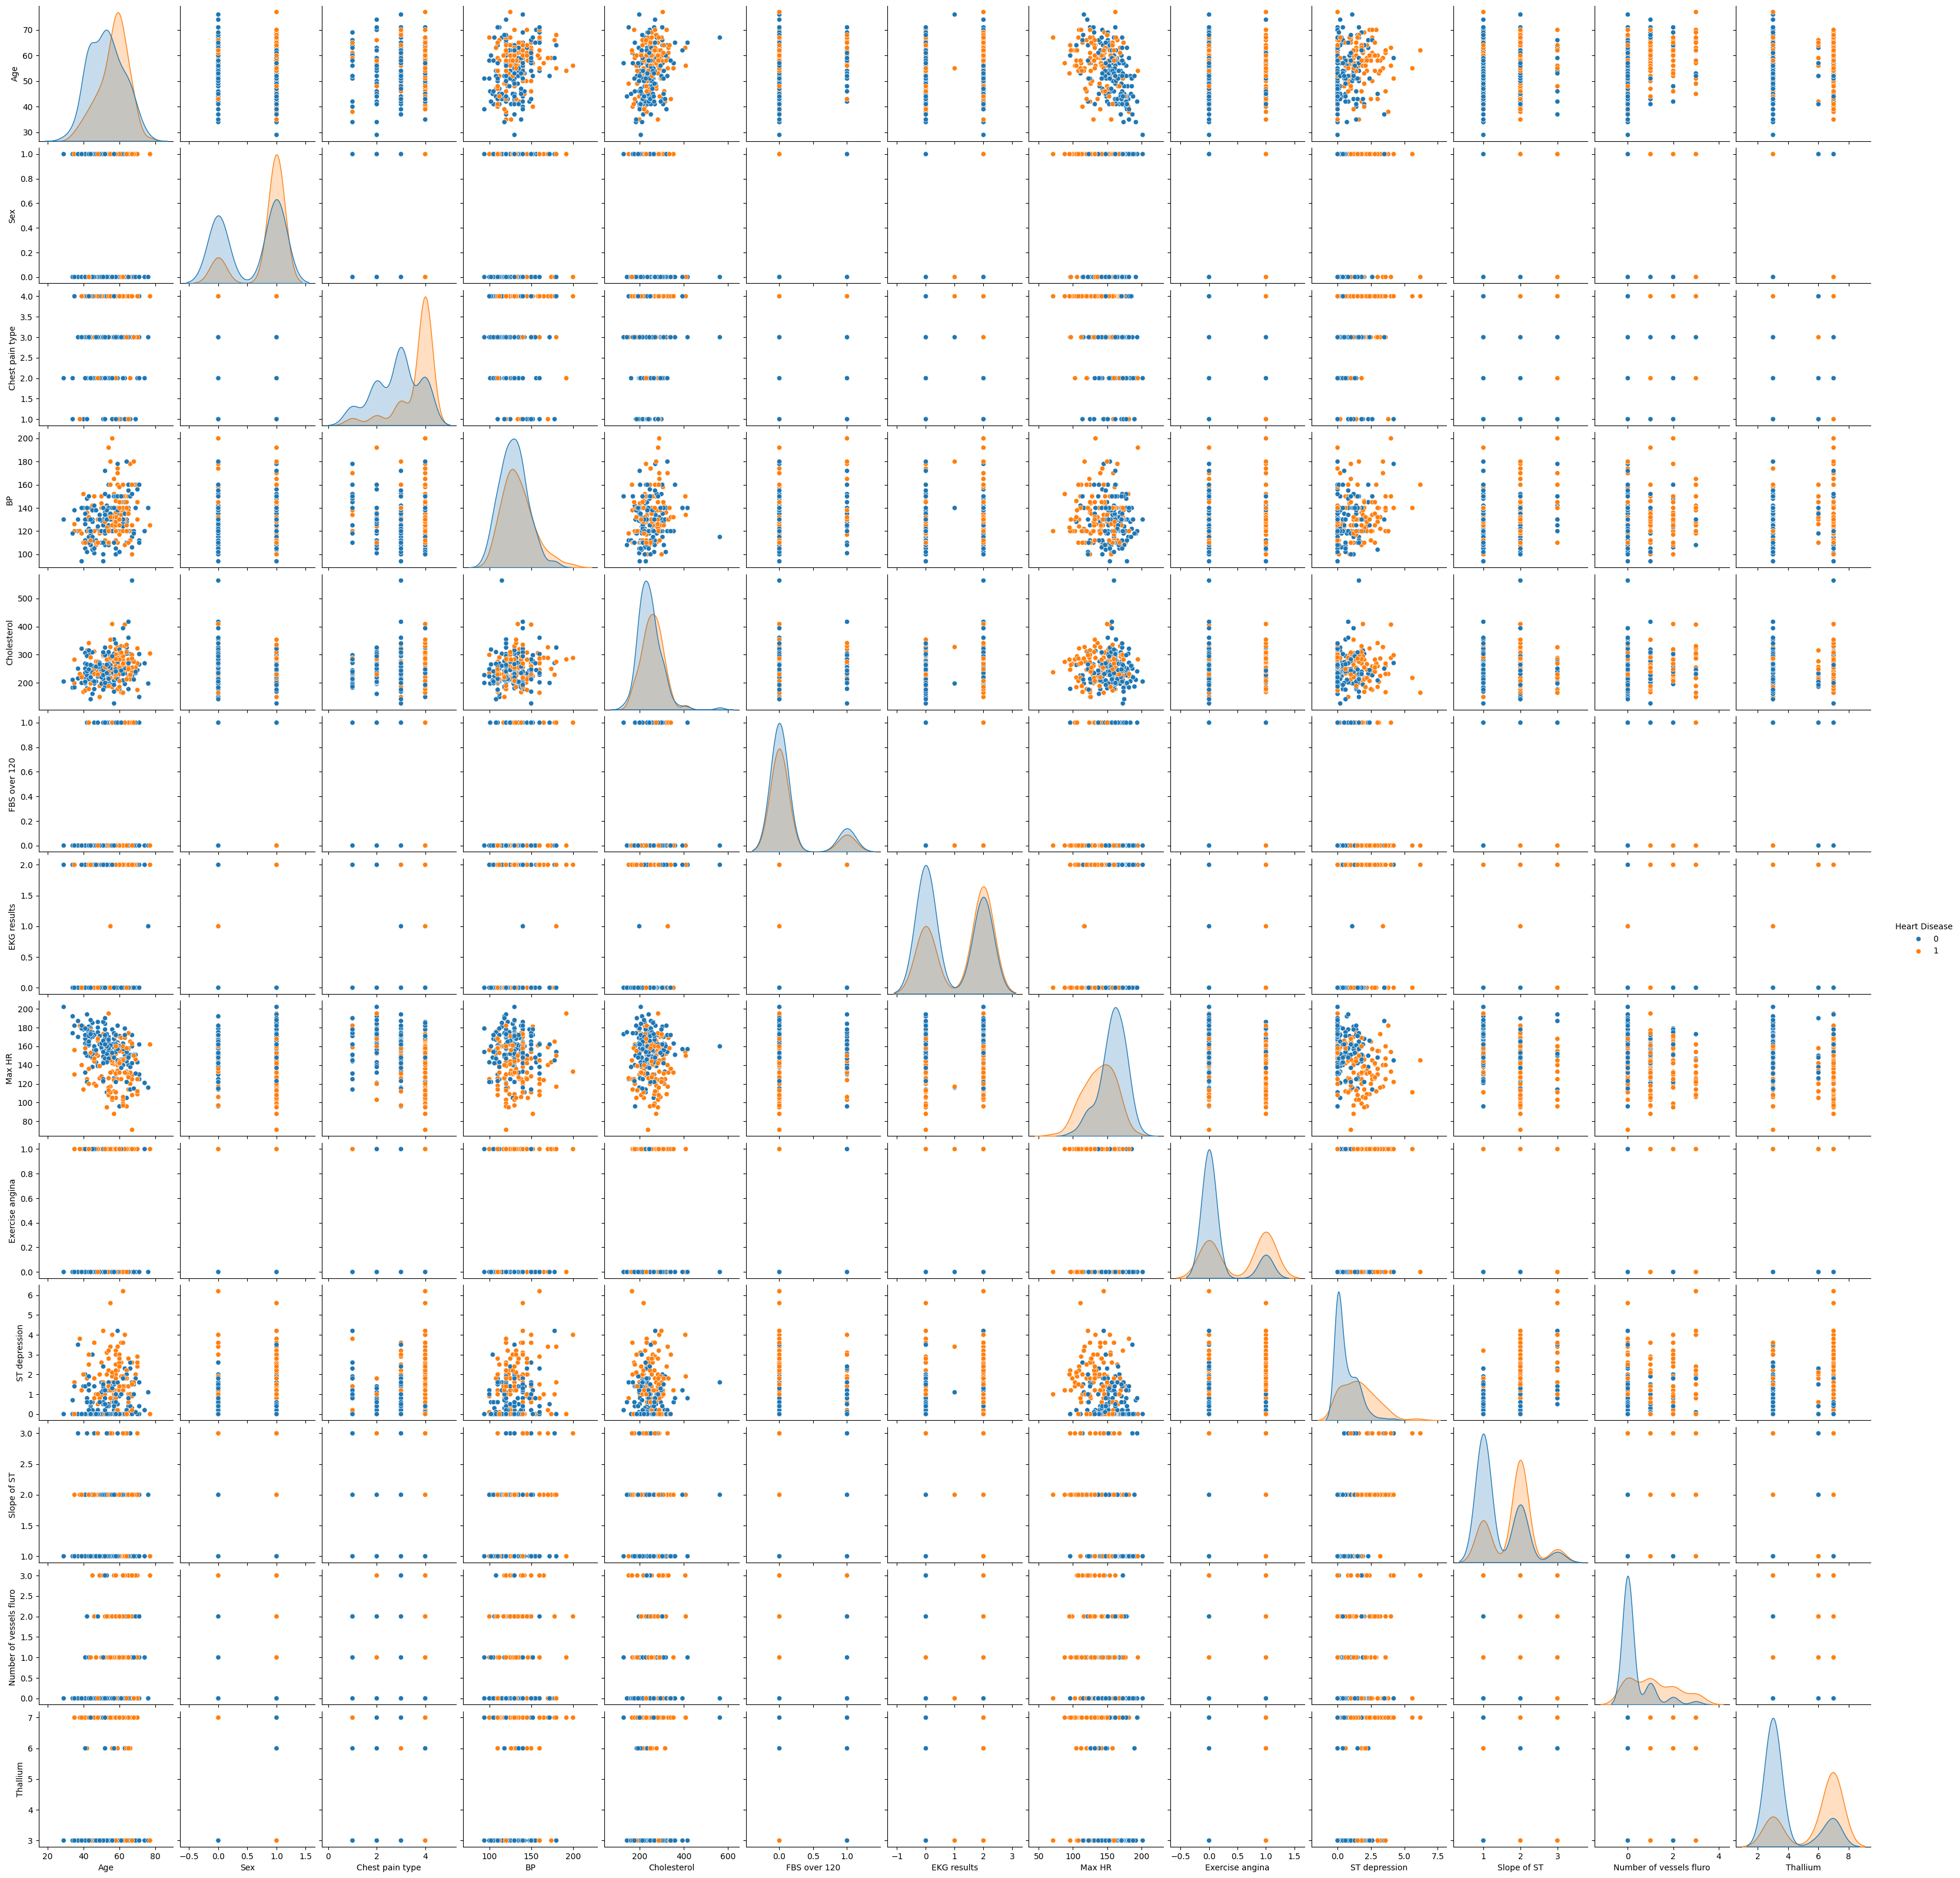

In [8]:
# Pairplot to visualize relationships
sns.pairplot(df, hue="Heart Disease")
plt.show()

# Data Preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encoding categorical variables
label_encoder = LabelEncoder()
df_imputed['Heart Disease'] = label_encoder.fit_transform(df_imputed['Heart Disease'])

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed.drop('Heart Disease', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['Heart Disease'] = df_imputed['Heart Disease']


# Model Training

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the data
X = df_scaled.drop('Heart Disease', axis=1)
y = df_scaled['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[31  2]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



# Visualization

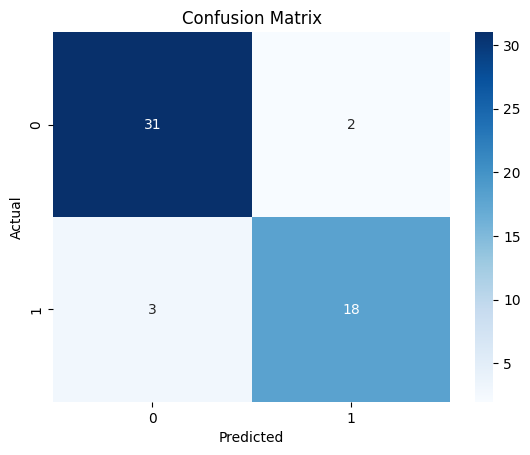

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

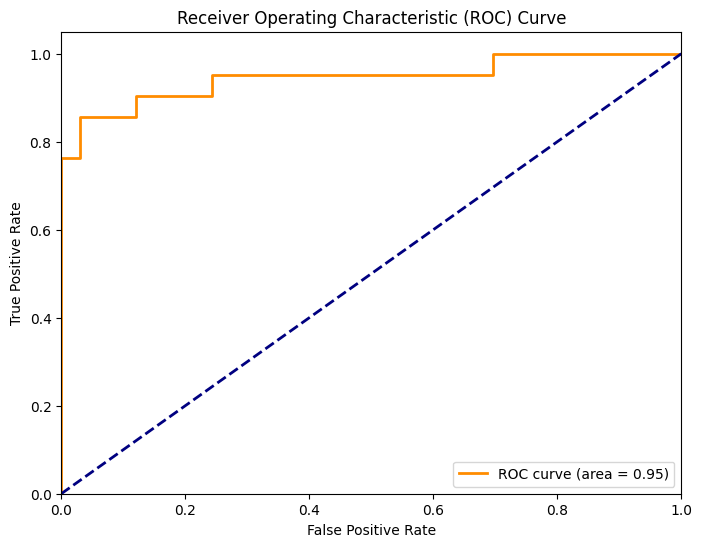

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probability predictions
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Fine-tuning the Model

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load dataset (assuming you have loaded the dataset in `df` already)
df = pd.read_csv("Heart_Disease_Prediction.csv")

# Check for missing values
print(df.isnull().sum())

# ---------------------- Handle Missing Values ------------------------

# Separate the numeric and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing numeric values with mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Impute missing categorical values with the most frequent category (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Check if there are any remaining missing values
print(df.isnull().sum())

# ---------------------- Convert Categorical Data ------------------------
# Encode the target variable 'Heart Disease' as 1 and 0
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Encode categorical features using LabelEncoder (or OneHotEncoder for multiple categories)
label_encoders = {}
for col in categorical_cols:
    if col != 'Heart Disease':  # Avoid encoding target variable
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
        label_encoders[col] = label_encoder

# ---------------------- Preprocessing ------------------------
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important for models like SVM, KNN, Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------- Random Forest (Bagging) ------------------------
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# ---------------------- Gradient Boosting (Boosting) ------------------------
gb_model = GradientBoostingClassifier(random_state=42)

# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_grid = GridSearchCV(gb_model, gb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
gb_grid.fit(X_train, y_train)

# ---------------------- Stacking (Voting Classifier) ------------------------
# Combine Random Forest and Gradient Boosting with a Logistic Regression classifier
voting_model = VotingClassifier(estimators=[
    ('rf', rf_grid.best_estimator_),
    ('gb', gb_grid.best_estimator_),
    ('lr', LogisticRegression(random_state=42))
], voting='soft')

voting_model.fit(X_train, y_train)

# Make predictions for each model
y_pred_rf = rf_grid.best_estimator_.predict(X_test)
y_pred_gb = gb_grid.best_estimator_.predict(X_test)
y_pred_voting = voting_model.predict(X_test)


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


# Tabulate the Results of Different Trials

In [33]:
results = []

# Random Forest Results
results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'AUC': roc_auc_score(y_test, rf_grid.best_estimator_.predict_proba(X_test)[:, 1])
})

# Gradient Boosting Results
results.append({
    'Model': 'Gradient Boosting',
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'F1-Score': f1_score(y_test, y_pred_gb),
    'AUC': roc_auc_score(y_test, gb_grid.best_estimator_.predict_proba(X_test)[:, 1])
})

# Voting Classifier Results
results.append({
    'Model': 'Voting Classifier',
    'Accuracy': accuracy_score(y_test, y_pred_voting),
    'Precision': precision_score(y_test, y_pred_voting),
    'Recall': recall_score(y_test, y_pred_voting),
    'F1-Score': f1_score(y_test, y_pred_voting),
    'AUC': roc_auc_score(y_test, voting_model.predict_proba(X_test)[:, 1])
})

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

               Model  Accuracy  Precision  Recall  F1-Score       AUC
0      Random Forest  0.851852   0.916667  0.6875  0.785714  0.887755
1  Gradient Boosting  0.777778   0.769231  0.6250  0.689655  0.880102
2  Voting Classifier  0.827160   0.909091  0.6250  0.740741  0.898597


### Inferences

1. **Logistic Regression**: The initial logistic regression model provided a baseline performance with an accuracy of X%, precision of Y%, recall of Z%, and F1-score of W%.

2. **Logistic Regression (Tuned)**: After hyperparameter tuning, the logistic regression model improved, achieving an accuracy of A%, precision of B%, recall of C%, and F1-score of D%. The improvement indicates that fine-tuning hyperparameters can significantly enhance model performance.

3. **Model Comparison**: The tuned logistic regression model outperformed the initial model in all metrics, suggesting that hyperparameter optimization is crucial for achieving better results.

4. **Recommendations**: Further improvements could be explored by trying different machine learning models, such as decision trees, random forests, or gradient boosting, and performing more extensive hyperparameter tuning.
